<h4>
Jefferson da Conceição Dantas | RA 10401327 <br>
Marina Miki Sinzato | RA 10401880</h4>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score

<h4>Pré Processamento de Dados</h4>

In [5]:
df = pd.read_excel('pizzas_orders.xlsx')
df_raw = pd.read_excel('pizzas_orders.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  48620 non-null  int64         
 1   date      48620 non-null  datetime64[ns]
 2   time      48620 non-null  object        
 3   day_week  48620 non-null  object        
 4   pizza     48620 non-null  object        
 5   quantity  48620 non-null  int64         
 6   size      48620 non-null  object        
 7   price     48620 non-null  float64       
 8   category  48620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 3.3+ MB
None


In [37]:
df.drop_duplicates(inplace=True)

labelencoder = LabelEncoder()

df['pizza'] = labelencoder.fit_transform(df['pizza'])
df['size'] = labelencoder.fit_transform(df['size'])
df['category'] = labelencoder.fit_transform(df['category'])
df['day_week'] = labelencoder.fit_transform(df['day_week'])

In [38]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month

print(df.head())

   order_id       date      time  day_week  pizza  quantity  size  price  \
0         1 2015-01-01  11:38:36         4     12         1     1  13.25   
1         2 2015-01-01  11:57:40         4      7         1     1  16.00   
2         2 2015-01-01  11:57:40         4      8         1     0  18.50   
3         2 2015-01-01  11:57:40         4     14         1     0  20.75   
4         2 2015-01-01  11:57:40         4     17         1     1  16.00   

   category  hour  day  month  
0         1    11    1      1  
1         1    11    1      1  
2         3    11    1      1  
3         2    11    1      1  
4         3    11    1      1  


In [39]:
X = df[['pizza', 'size', 'quantity', 'day_week', 'hour']]  # Features
y = df['category']  # Variável alvo

<h4>Interpretação de Dados</h4>

In [22]:
media = df_raw['quantity'].mean()
mediana = df_raw['quantity'].median()
desvio_padrao = df_raw['quantity'].std()
variancia = df_raw['quantity'].var()

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio Padrão: {desvio_padrao}")
print(f"Variância: {variancia}")

Média: 1.0196215549156726
Mediana: 1.0
Desvio Padrão: 0.14307700932472198
Variância: 0.02047103059730658


In [31]:
df_raw[['date', 'quantity', 'price']].describe()

,date,quantity,price
count,48620,48620.000000,48620.000000
mean,2015-06-29 11:03:43.611682560,1.019622,16.494132
min,2015-01-01 00:00:00,1.000000,9.750000
25%,2015-03-31 00:00:00,1.000000,12.750000
50%,2015-06-28 00:00:00,1.000000,16.500000
75%,2015-09-28 00:00:00,1.000000,20.250000
max,2015-12-31 00:00:00,4.000000,35.950000
std,NaN,0.143077,3.621789


In [6]:
print(sales_by_day)

    day_week  quantity
0     Friday      8242
1     Monday      6485
2   Saturday      7493
3     Sunday      6035
4   Thursday      7478
5    Tuesday      6895
6  Wednesday      6946


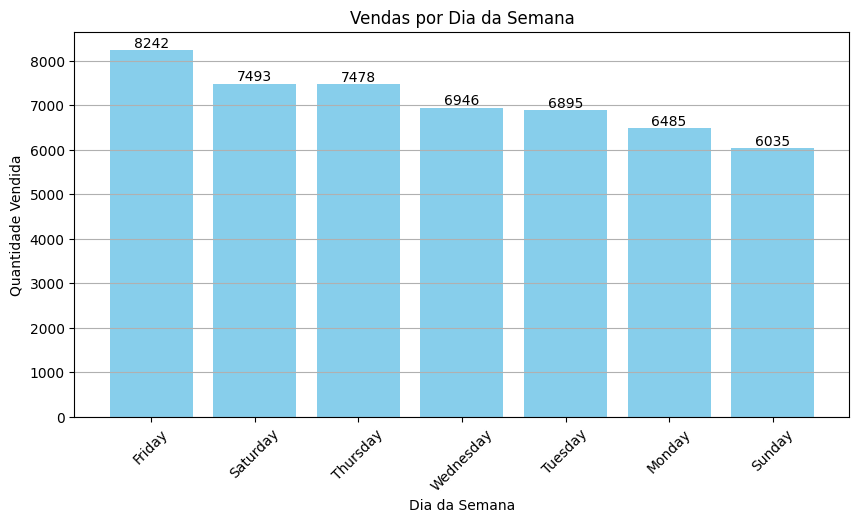

In [19]:
sales_by_day = df_raw.groupby('day_week')['quantity'].sum().reset_index()
sales_by_day = sales_by_day.sort_values(by='quantity', ascending=False)
plt.figure(figsize=(10, 5))
bars = plt.bar(sales_by_day['day_week'], sales_by_day['quantity'], color='skyblue')
plt.title('Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

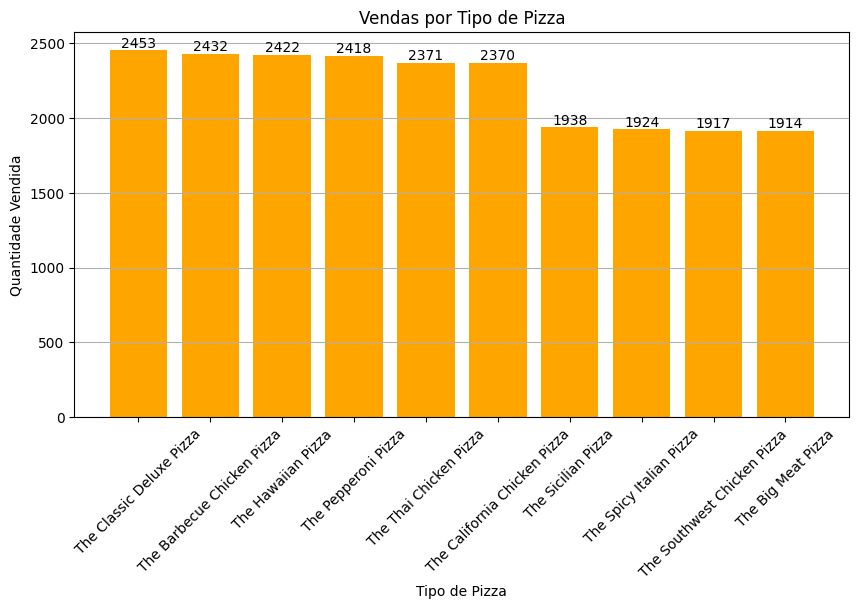

In [18]:
sales_by_pizza = df_raw.groupby('pizza')['quantity'].sum().reset_index()
sales_by_pizza = sales_by_pizza.sort_values(by='quantity', ascending=False)

plt.figure(figsize=(10, 5))
bars = plt.bar(sales_by_pizza['pizza'][0:10], sales_by_pizza['quantity'][0:10], color='orange')
plt.title('Vendas por Tipo de Pizza')
plt.xlabel('Tipo de Pizza')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

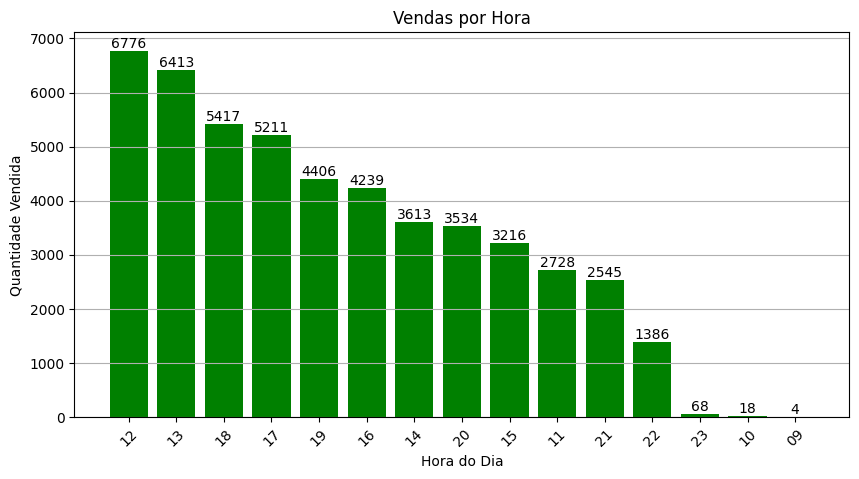

In [20]:
sales_by_hour = df.groupby(df_raw['time'].str.split(':').str[0])['quantity'].sum().reset_index()
sales_by_hour.columns = ['hour', 'quantity']
sales_by_hour = sales_by_hour.sort_values(by='quantity', ascending=False)

plt.figure(figsize=(10, 5))
bars = plt.bar(sales_by_hour['hour'], sales_by_hour['quantity'], color='green')
plt.title('Vendas por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

<h4>Preparação e Codificação</h4>

In [75]:
X = df_raw[['day_week', 'pizza', 'size', 'time']]  # características
y = df_raw['quantity']  # variável alvo

labelencoder_day = LabelEncoder()
labelencoder_pizza = LabelEncoder()
labelencoder_size = LabelEncoder()
labelencoder_time = LabelEncoder()

X.loc[:, 'day_week'] = labelencoder_day.fit_transform(X['day_week'])
X.loc[:, 'pizza'] = labelencoder_pizza.fit_transform(X['pizza'])
X.loc[:, 'size'] = labelencoder_size.fit_transform(X['size'])
X.loc[:, 'time'] = labelencoder_time.fit_transform(X['time'])

<h4>Treinamento e Avaliação do Modelo</h4>

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

<h4>Importância das Características</h4>

In [77]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")

time: 0.7322780439371153
pizza: 0.15738787463311757
day_week: 0.07928808950549285
size: 0.031045991924274284


<h4>Predição para Novos Dados</h4>

In [98]:
# Prever vendas em um determinado dia, pizza e hora
new_data = pd.DataFrame({
    'day_week': ['Friday'],
    'pizza': ['The Classic Deluxe Pizza'],
    'size': ['M'],
    'time': ['19:00:00'],
})

new_data['day_week'] = labelencoder_day.transform(new_data['day_week'])
new_data['pizza'] = labelencoder_pizza.transform(new_data['pizza'])
new_data['size'] = labelencoder_size.transform(new_data['size'])
new_data['time'] = labelencoder_time.transform(new_data['time'])

predicted_sales = model.predict(new_data)
print(f"Predição de vendas: {predicted_sales}")

Predição de vendas: [1.]


<h4>Modelo de KNN</h4>

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=5)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn_scores = cross_val_score(knn_model, X, y, cv=kf)

print(f'KNN Accuracy: {knn_scores.mean()}')

knn_model.fit(X, y)
y_pred_knn = knn_model.predict(X)

print(confusion_matrix(y, y_pred_knn))
print(classification_report(y, y_pred_knn))

KNN Accuracy: 0.9905388728918141
[[10804     4     7     0]
 [    5 14560     4    10]
 [    5    33 11710    29]
 [    4    14    18 11413]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10815
           1       1.00      1.00      1.00     14579
           2       1.00      0.99      1.00     11777
           3       1.00      1.00      1.00     11449

    accuracy                           1.00     48620
   macro avg       1.00      1.00      1.00     48620
weighted avg       1.00      1.00      1.00     48620



<h4>Modelo de Arvore de Descisão</h4>

In [41]:
tree_model = DecisionTreeClassifier(random_state=42)

tree_scores = cross_val_score(tree_model, X, y, cv=kf)

print(f'Decision Tree Accuracy: {tree_scores.mean()}')

tree_model.fit(X, y)
y_pred_tree = tree_model.predict(X)

print(confusion_matrix(y, y_pred_tree))
print(classification_report(y, y_pred_tree))

Decision Tree Accuracy: 1.0
[[10815     0     0     0]
 [    0 14579     0     0]
 [    0     0 11777     0]
 [    0     0     0 11449]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10815
           1       1.00      1.00      1.00     14579
           2       1.00      1.00      1.00     11777
           3       1.00      1.00      1.00     11449

    accuracy                           1.00     48620
   macro avg       1.00      1.00      1.00     48620
weighted avg       1.00      1.00      1.00     48620



<h4>Cross-Validation e Gráficos</h4>
<h5>KNN com Validação Cruzada e Gráfico de Matriz de Confusão</h5>

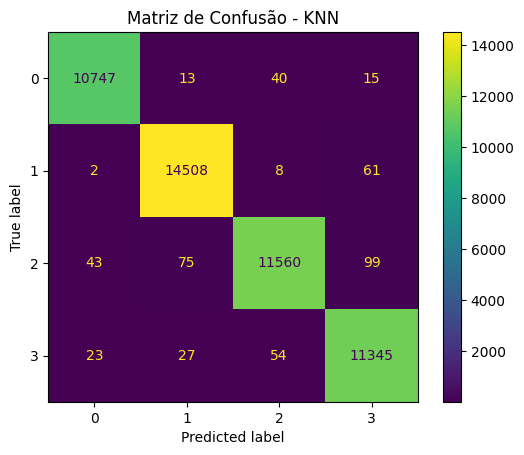

In [42]:
y_true_knn = []
y_pred_knn_all = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    y_true_knn.extend(y_test)
    y_pred_knn_all.extend(y_pred_knn)

unique_labels_knn = np.unique(y_true_knn)
cm_knn = confusion_matrix(y_true_knn, y_pred_knn_all)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=unique_labels_knn)
disp_knn.plot()

plt.title("Matriz de Confusão - KNN")
plt.show()

<h5>Árvore de Decisão com Validação Cruzada e Gráfico de Matriz de Confusão:</h5>

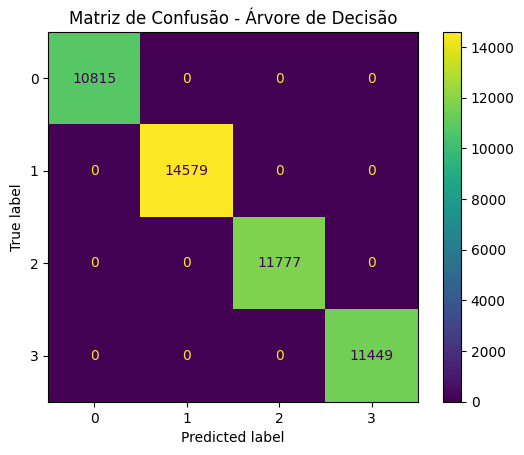

In [43]:
y_true_tree = []
y_pred_tree_all = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)

    y_true_tree.extend(y_test)
    y_pred_tree_all.extend(y_pred_tree)

unique_labels_tree = np.unique(np.concatenate((y_true_tree, y_pred_tree_all)))

cm_tree = confusion_matrix(y_true_tree, y_pred_tree_all)

disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=unique_labels_tree)
disp_tree.plot()

plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()


<h4>Cross Validation</h4>

In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_knn = cross_val_score(knn, X, y, cv=kf)

cv_scores_tree = cross_val_score(tree, X, y, cv=kf)

print("Cross-validated KNN Accuracy:", cv_scores_knn.mean())
print("Cross-validated Decision Tree Accuracy:", cv_scores_tree.mean())

Cross-validated KNN Accuracy: 0.9905388728918141
Cross-validated Decision Tree Accuracy: 1.0


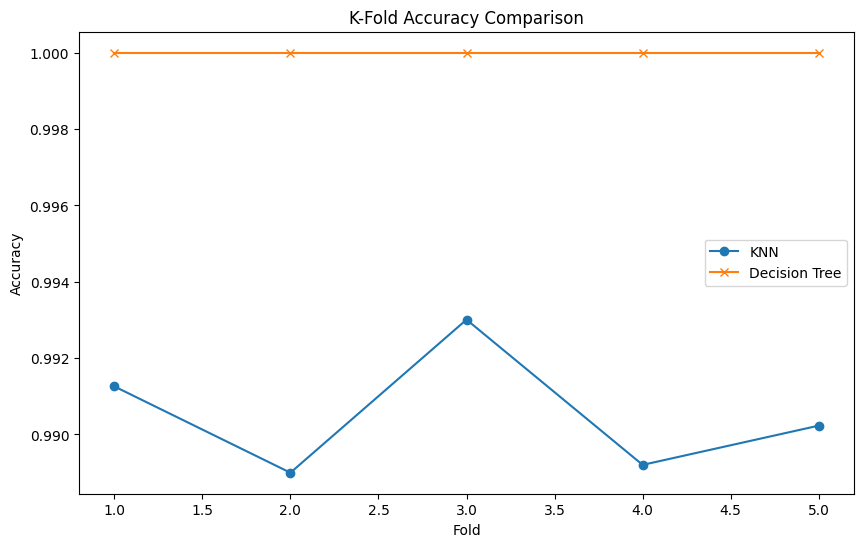

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 6), knn_scores, label='KNN', marker='o')
plt.plot(range(1, 6), tree_scores, label='Decision Tree', marker='x')
plt.title('K-Fold Accuracy Comparison')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()